# CNN: Vegetable Classification


## Import Libraries

In [1]:
import pandas as pd #importing pandas libaries 
import numpy as np#importing numpy libraries

import os#importing OS module libraries
import PIL#Importing Python Imaging Library

import matplotlib.pyplot as plt#importing matplotlib for plotting
import seaborn as sns#importing seaborn libraries for statical data visualization 

import tensorflow as tf# importing tesorflow formachine learning
from tensorflow import keras# importing necessary modules from tensorflow and Keras
from tensorflow.keras import layers#importing layers from tensorflow.keras libraries
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

#display all comumns of the dataframe
#pd.options.display.max_columns = None

### Rule to connect your Drive for Dataset


1.   Create a Google Drive folder named **Level6**.
2.   Create a sub-folder named **AI**.
3.   Create another sub folder named NLP Datasets, (You can just upload the folder from above Google Drvie link.
4.   Now, at last upload **Vegetable Classification** folder.

*Note: Why follow this format?
This format for locating file will help every member of the group to streamline their path and there wont be any error while loading the dataset.*


## Load Dataset


In [2]:
data_dir = "D:\College\AI ML\Vegetable Classification\Train"# This is the directory path of our csv files

In [3]:
# Hyper-parameters:
batch_size = 32 #Change
#it helps to divide the data in the size of batch for better processing 
img_height = 180
img_width = 180

In [4]:
#Train dataset using images from a directory
train_ds = tf.keras.utils.image_dataset_from_directory(
  # Path to the directory containing images
  data_dir,
  # Proportion of data to use for training
  validation_split=0.2,
  # Subset of data to use (in this case, training)
  subset="training",
  # Seed for random shuffling and splitting
  seed=100,
  # Target image size
  image_size=(img_height, img_width),
  # Batch size for the dataset
  batch_size=batch_size #Change in batch size for faster model train
  )

Found 6673 files belonging to 5 classes.
Using 5339 files for training.


In [5]:
#Validation dataset using images from a directory
val_ds = tf.keras.utils.image_dataset_from_directory(
  # Path to the directory containing images
  data_dir,
  # Proportion of data to use for validation
  validation_split=0.2,
  # Subset of data to use (in this case, validation)
  subset="validation",
  # Seed for random shuffling and splitting
  seed=100,
  # Target image size
  image_size=(img_height, img_width),
  # Batch size for the dataset
  batch_size=batch_size
  )

Found 6673 files belonging to 5 classes.
Using 1334 files for validation.


In [6]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

['Bell-Pepper', 'Lemon', 'Onion', 'Potato', 'Tomato']


In [7]:
# Loop through batches of images and labels in the train dataset
for image_batch, labels_batch in train_ds:

    print("Image batch shape:", image_batch.shape)#prnting the shape of current batch of image
    print("Labels batch shape:", labels_batch.shape)# current batch labels are being printed
    break

Image batch shape: (32, 180, 180, 3)
Labels batch shape: (32,)


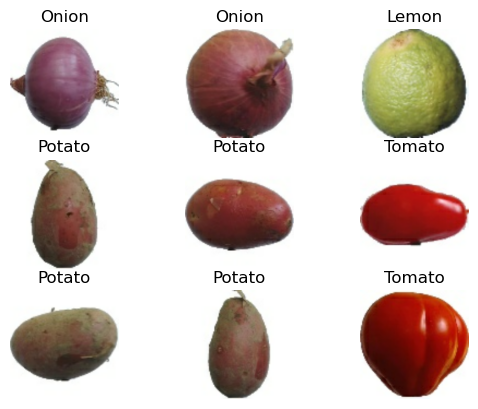

In [21]:
# Loop through the first batch of images and labels in the train dataset
for images, labels in train_ds.take(1):
  # Loop through the first 9 images in the batch
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)#creating sub plot of grid size 3*3 
    plt.imshow(images[i].numpy().astype("uint8"))#imshow is used fordisplaying the images from data
    plt.title(class_names[labels[i]])# Showing the title to the images from the dataset
    plt.axis("off")# it helps to off axis label whch helps to give clear image

## First Model Generation

In [9]:
def generate_model(image_height, image_width, nchannels, num_classes):
    """
    This function will generate a model with the set of hyperparameters defined above.
    Input Args:
    image_height[int] = Height of an image.
    image_width[int] = Width of an image.
    nchannels[int] = Number of channels in the image.
    num_classes[int] = Number of classes in the dataset.
    Output Args:
    model -> A CNN model.
    """
    model = tf.keras.Sequential([
        # Rescaling and input layer, [For Keras, the input shape must be (image height, image width, channels)]
        layers.Rescaling(1./255, input_shape=(image_height, image_width, nchannels)),

        # First Block of Convolution and Pooling Operations.
        layers.Conv2D(16, (3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),

        # Second Block of Convolution and Pooling Operations.
        layers.Conv2D(32, (3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),

        # Third Block of Convolution and Pooling Operations.
        layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),



        # Fully connected classifier.
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax")
    ])
    return model


In [10]:
#Calculating the number of classes
num_classes = len(class_names)
#Generating a model using a function
model = generate_model(img_height, img_width, 3, num_classes)

## First Model Summary

In [11]:
model.summary()# it provides the summary of model 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [12]:
#Plottig the model
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [13]:
model.compile(optimizer='adam',#adam Optimizer is extension of stochastic gradient descent  which is used to minimize the cost function
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),#loss is the lossfuction of model
              metrics=['accuracy'])#Compiling  the model with  adam optimizer, loss function and metrics

In [14]:
loss0, accuracy0=model.evaluate(val_ds)# evaluating the model of the dataset

D:\Required intsall\Anaconda\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


42/42 [==============================] - 3s 51ms/step - loss: 1.6181 - accuracy: 0.1807


## Training the First Model

In [15]:
#Number of epochs for training the model
epochs = 5

#Training the model using the fit method
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
167/167 [==============================] - 42s 248ms/step - loss: 0.1827 - accuracy: 0.9301 - val_loss: 0.0094 - val_accuracy: 0.9970
Epoch 2/5
167/167 [==============================] - 42s 252ms/step - loss: 0.0344 - accuracy: 0.9921 - val_loss: 0.0073 - val_accuracy: 0.9970
Epoch 3/5
167/167 [==============================] - 43s 256ms/step - loss: 3.7195e-04 - accuracy: 1.0000 - val_loss: 1.0478e-04 - val_accuracy: 1.0000
Epoch 4/5
167/167 [==============================] - 44s 261ms/step - loss: 6.6851e-05 - accuracy: 1.0000 - val_loss: 5.6675e-05 - val_accuracy: 1.0000
Epoch 5/5
167/167 [==============================] - 42s 254ms/step - loss: 4.1233e-05 - accuracy: 1.0000 - val_loss: 3.7083e-05 - val_accuracy: 1.0000


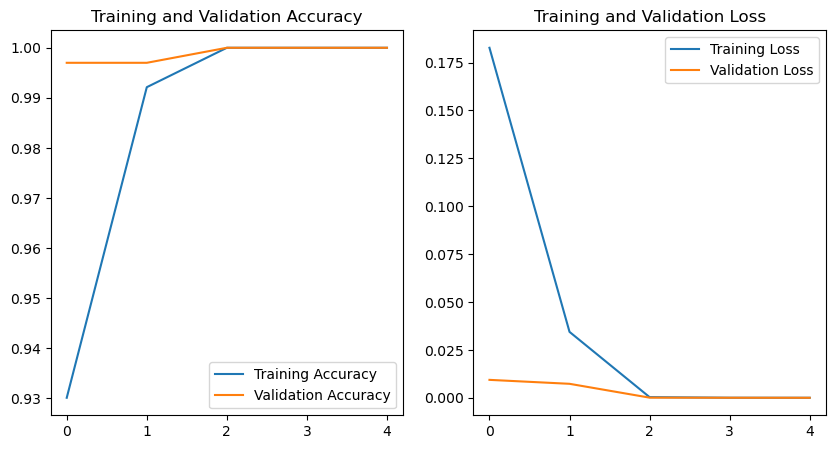

In [16]:
#Training accuracy values
acc = history.history['accuracy']
#Validation accuracy values
val_acc = history.history['val_accuracy']

#Training loss values
loss = history.history['loss']
#Validation loss values
val_loss = history.history['val_loss']

epochs_range = range(epochs)

#Plot Training Accuracy and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plot Training Loss and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
AUTOTUNE = tf.data.AUTOTUNE# Optimal setting is determined by AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)#.cache is used to incrase training speed
# shuffle is used for randomise in with 100 buffersize.
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [9]:
norm_layer = layers.Rescaling(1/255)# normalizinng value to 0-1
normalized_ds = train_ds.map(lambda x,y: (norm_layer(x), y))#normalizing the entire train_ds
image_batch, labels_batch = next(iter(normalized_ds))#normalized images and labels being extracted
first_image = image_batch[0]#first image from batch
print(np.min(first_image), np.max(first_image))

0.100653715 1.0


# Improved Model 

## Data Agumentation

In [10]:
data_augmentation = keras.Sequential(# Creating Sequitialmodel fordata agumentation
    [layers.RandomFlip('horizontal', input_shape=(img_height, img_width, 3)),#it flips image horizantally
     layers.RandomRotation(0.1),#it rotates image by 0.1 radian
     layers.RandomZoom(0.1)]#it zoomtheimage by factor 0.1
)

In [16]:
num_original_images = len(train_ds)#Number of orginal images in train_ds
num_augmented_images = len(augmented_images)#number of augmented images in augmented_images

print(f"Number of original images: {num_original_images}")
print(f"Number of augmented images: {num_augmented_images}")

Number of original images: 167
Number of augmented images: 32


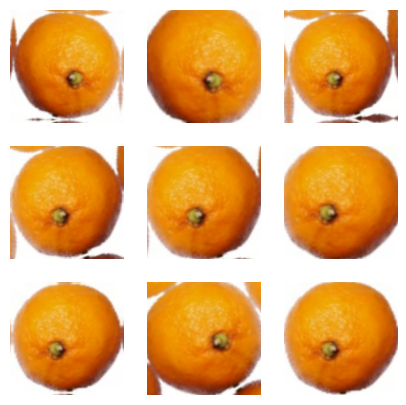

In [11]:
plt.figure(figsize=(5,5))#plotting real image and data agmentation image
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')

# Updated Custom Model Generation

In [22]:
num_class = len(class_names)

model = tf.keras.Sequential([
    data_augmentation,
    layers.Rescaling(1/255),
    # First Block of Convolution and Pooling Operations.
    layers.Conv2D(16,3, padding="same", activation="relu"),
    layers.MaxPooling2D(),

        # Second Block of Convolution and Pooling Operations.
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),

        # Third Block of Convolution and Pooling Operations.
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),



        # Fully connected classifier.
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(num_classes, name='outputs')

])

In [23]:
model.compile(optimizer='adam',#Compiling  the model with  adam optimizer, loss function and metrics
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])
    # Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),

# Updated Custom Model Summary

In [24]:
model.summary()#information about model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

# Updated Custom Model Train

In [25]:
epochs = 10
history =model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs,#this gives the number of epochs which is 10
    callbacks=[early_stopping]
)

Epoch 1/10
167/167 [==============================] - 49s 286ms/step - loss: 0.3876 - accuracy: 0.8404 - val_loss: 0.0417 - val_accuracy: 0.9880
Epoch 2/10
167/167 [==============================] - 48s 286ms/step - loss: 0.0931 - accuracy: 0.9721 - val_loss: 0.0435 - val_accuracy: 0.9828
Epoch 3/10
167/167 [==============================] - 50s 299ms/step - loss: 0.0340 - accuracy: 0.9899 - val_loss: 0.0089 - val_accuracy: 0.9993
Epoch 4/10
167/167 [==============================] - 48s 287ms/step - loss: 0.0145 - accuracy: 0.9948 - val_loss: 6.2440e-04 - val_accuracy: 1.0000
Epoch 5/10
167/167 [==============================] - 48s 285ms/step - loss: 0.0333 - accuracy: 0.9884 - val_loss: 0.0175 - val_accuracy: 0.9925
Epoch 6/10
167/167 [==============================] - 48s 287ms/step - loss: 0.0689 - accuracy: 0.9790 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 7/10
167/167 [==============================] - 48s 290ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0020 - va

In [26]:
model.save("/content/drive/MyDrive/Level6/AI/Image Datasets/Vegetable Classification/Train/trained_model.h5")

D:\Required intsall\Anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
# Evaluate the model on the validation data
val_loss, val_acc = model.evaluate(val_ds)
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

42/42 [==============================] - 2s 53ms/step - loss: 6.9424e-04 - accuracy: 1.0000
Validation Loss: 0.0007, Validation Accuracy: 1.0000


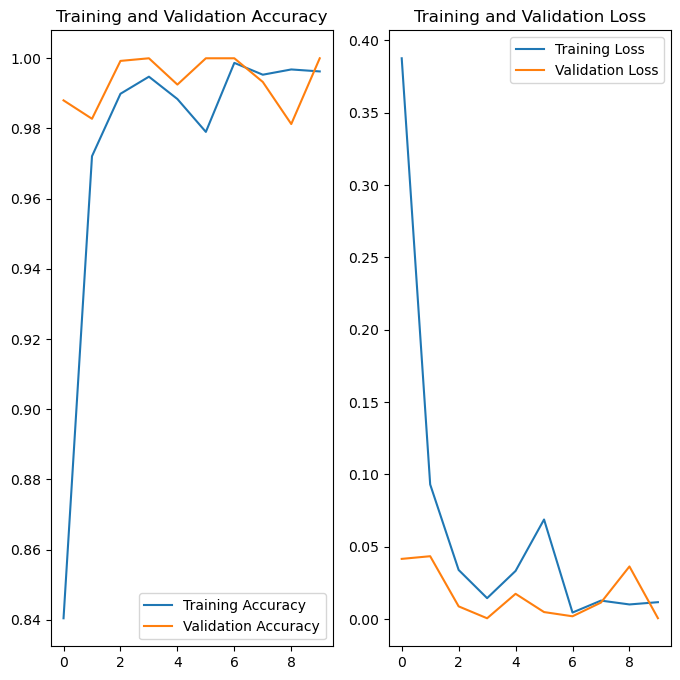

In [28]:
#Training accuracy values
acc = history.history['accuracy']
#Validation accuracy values
val_acc = history.history['val_accuracy']

#Training loss values
loss = history.history['loss']
#Validation loss values
val_loss = history.history['val_loss']

epochs_range = range(epochs)

#Plot Training Accuracy and Validation Accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plot Training Loss and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Predicitons

1/1 [==============================] - 0s 121ms/step
The image is Lemon and the accuracy is 100.00%


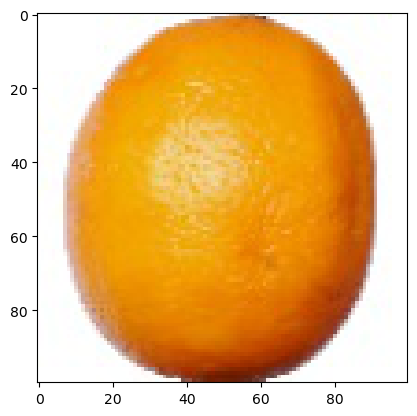

In [29]:
from PIL import Image
test1 = "D:\College\AI ML\Vegetable Classification/Test/9_100(1).jpg"
sample_img =np.asarray(Image.open(test1))
imgplot = plt.imshow(sample_img)

img = tf.keras.utils.load_img(
    test1, target_size = (img_height,img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)],np.max(score)*100))


1/1 [==============================] - 0s 23ms/step
The image is Potato and the accuracy is 99.53%


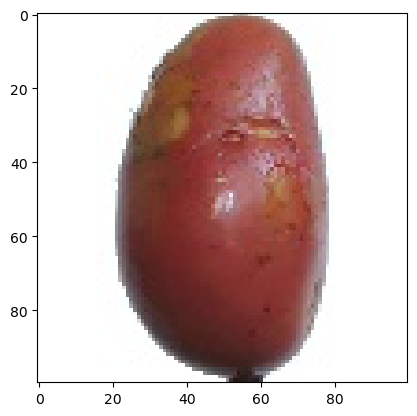

In [30]:
from PIL import Image
test1 = "D:\College\AI ML\Vegetable Classification/Test/26_100(1).jpg"

sample_img =np.asarray(Image.open(test1))
imgplot = plt.imshow(sample_img)

img = tf.keras.utils.load_img(
    test1, target_size = (img_height,img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)],np.max(score)*100))


1/1 [==============================] - 0s 23ms/step
The image is Bell-Pepper and the accuracy is 100.00%


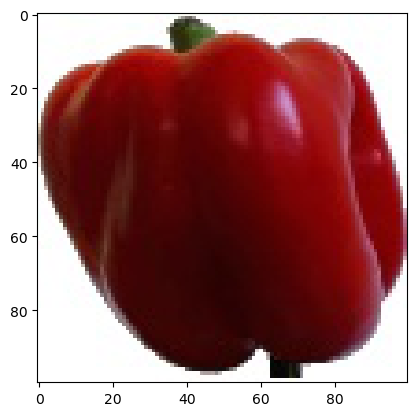

In [31]:
from PIL import Image
test1 = "D:\College\AI ML\Vegetable Classification/Test/13_100(1).jpg"

sample_img =np.asarray(Image.open(test1))
imgplot = plt.imshow(sample_img)

img = tf.keras.utils.load_img(
    test1, target_size = (img_height,img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)],np.max(score)*100))


1/1 [==============================] - 0s 23ms/step
The image is Onion and the accuracy is 100.00%


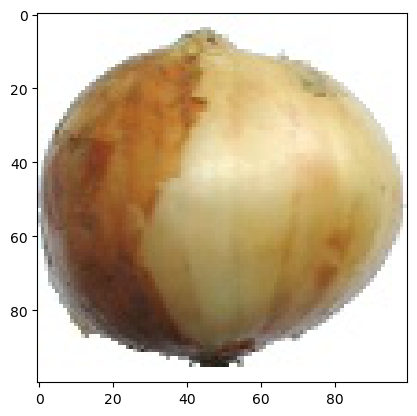

In [32]:
from PIL import Image
test1 = "D:\College\AI ML\Vegetable Classification/Test/15_100(1).jpg"

sample_img =np.asarray(Image.open(test1))
imgplot = plt.imshow(sample_img)

img = tf.keras.utils.load_img(
    test1, target_size = (img_height,img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)],np.max(score)*100))


1/1 [==============================] - 0s 24ms/step
The image is Tomato and the accuracy is 100.00%


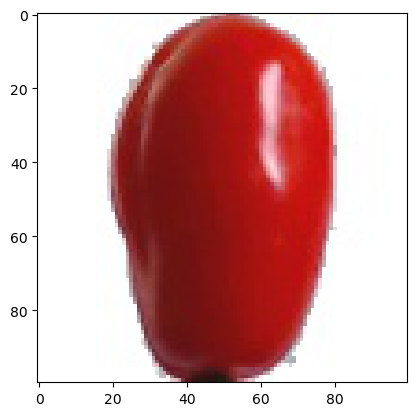

In [33]:
from PIL import Image
test1 = "D:\College\AI ML\Vegetable Classification/Test/75_100(1).jpg"

sample_img =np.asarray(Image.open(test1))
imgplot = plt.imshow(sample_img)

img = tf.keras.utils.load_img(
    test1, target_size = (img_height,img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)],np.max(score)*100))


# Pretrained Model

In [80]:
data_dir = "D:\College\AI ML\Vegetable Classification\Train"

In [102]:
batch_size = 32
image_size = (180, 180) 
num_classes = 5 

In [144]:
from tensorflow.keras.applications import ResNet50#this import the resnet 50 architecture  from keras application module 
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, Sequential# it imports the modles class from keras models
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import os

In [104]:
# Split the data into train and validation sets
data_generator = ImageDataGenerator(
    rescale=1/255,    # Normalize pixel values to [0, 1]
    validation_split=0.2,  # Adjust the validation split ratio as needed
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [105]:
train_ds = data_generator.flow_from_directory(#Creating  a data generator  for training data
    data_dir,#path of the directory
    target_size=image_size,#size of the image
    batch_size=batch_size,# batch size  already mentioned
    class_mode='categorical',
    subset='training'#subset of data is training
)

val_ds = data_generator.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 5341 images belonging to 5 classes.
Found 1332 images belonging to 5 classes.


## 1. MobileNet

### 1.1 Loading MobileNet Model

In [120]:
# Load pre-trained ResNet50 model (excluding the top layers)
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False)

# Add custom top layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

# Create the final model
mobilenet_model = Model(inputs=base_model.input, outputs=output)

In [130]:
# Freeze initial layers of the base model
freeze_layer_num = 100
for layer in base_model.layers[:freeze_layer_num]:
    layer.trainable = False

# Compile the model
mobilenet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [131]:
# Define callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)


### 1.2 Summary of MobileNet Model

In [132]:
mobilenet_model.summary()#summary of the model till now

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, None, None, 3)]      0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, None, None, 32)       864       ['input_14[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, None, None, 32)       128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, None, None, 32)       0         ['bn_Conv1[0][0]']     

### 1.3 Training MobileNet Model

In [133]:
# Train the model
epochs = 10# number of epochs for training
history = mobilenet_model.fit(
    train_ds,
    validation_data=val_ds,# validation data is generated
    epochs=epochs,
    callbacks=[early_stopping]
)

Epoch 1/10
167/167 [==============================] - 72s 412ms/step - loss: 0.1480 - accuracy: 0.9493 - val_loss: 0.0217 - val_accuracy: 0.9910
Epoch 2/10
167/167 [==============================] - 67s 400ms/step - loss: 0.0281 - accuracy: 0.9918 - val_loss: 0.0484 - val_accuracy: 0.9850
Epoch 3/10
167/167 [==============================] - 68s 407ms/step - loss: 0.0174 - accuracy: 0.9936 - val_loss: 0.0322 - val_accuracy: 0.9865
Epoch 4/10
167/167 [==============================] - 68s 407ms/step - loss: 0.0130 - accuracy: 0.9951 - val_loss: 0.1480 - val_accuracy: 0.9632
Epoch 5/10
167/167 [==============================] - 68s 407ms/step - loss: 0.0207 - accuracy: 0.9936 - val_loss: 0.0511 - val_accuracy: 0.9835
Epoch 6/10
167/167 [==============================] - 65s 390ms/step - loss: 0.0160 - accuracy: 0.9940 - val_loss: 0.1075 - val_accuracy: 0.9677


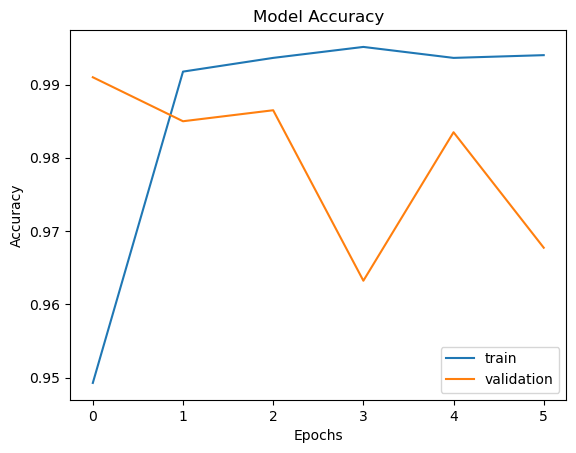

In [134]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

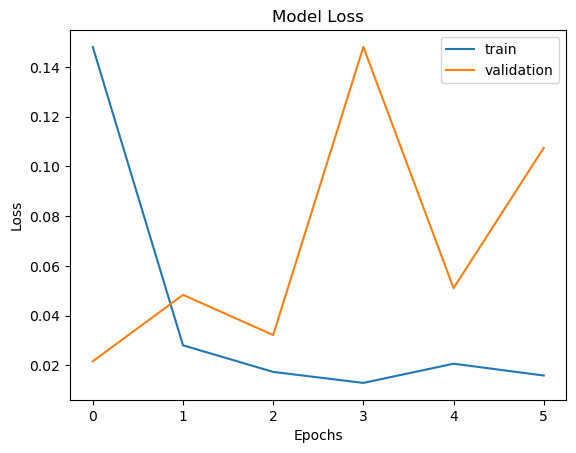

In [135]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

In [136]:
loss0, accuracy0=mobilenet_model.evaluate(val_ds)

42/42 [==============================] - 13s 311ms/step - loss: 0.0262 - accuracy: 0.9917


## Prediction Through MobileNet Model

1/1 [==============================] - 1s 713ms/step
The image is Bell-Pepper and the accuracy is 34.70%


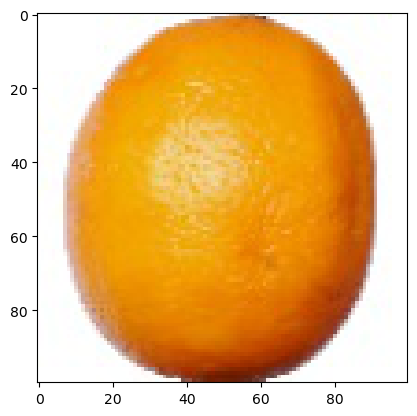

In [137]:
from PIL import Image
testb1 = "D:\College\AI ML\Vegetable Classification/Test/9_100(1).jpg"

sample_img =np.asarray(Image.open(testb1))
imgplot = plt.imshow(sample_img)

img = tf.keras.utils.load_img(
    testb1, target_size = (img_height,img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = mobilenet_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)],np.max(score)*100))


1/1 [==============================] - 0s 36ms/step
The image is Bell-Pepper and the accuracy is 29.12%


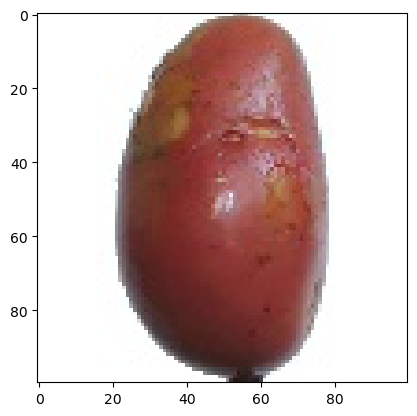

In [138]:
from PIL import Image
testb2 = "D:\College\AI ML\Vegetable Classification/Test/26_100(1).jpg"

sample_img =np.asarray(Image.open(testb2))
imgplot = plt.imshow(sample_img)

img = tf.keras.utils.load_img(
    testb2, target_size = (img_height,img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = mobilenet_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)],np.max(score)*100))


1/1 [==============================] - 0s 33ms/step
The image is Lemon and the accuracy is 26.03%


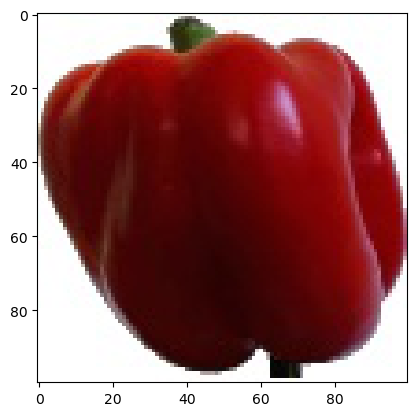

In [139]:
from PIL import Image
testb2 = "D:\College\AI ML\Vegetable Classification/Test/13_100(1).jpg"

sample_img =np.asarray(Image.open(testb2))
imgplot = plt.imshow(sample_img)

img = tf.keras.utils.load_img(
    testb2, target_size = (img_height,img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = mobilenet_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)],np.max(score)*100))


1/1 [==============================] - 0s 34ms/step
The image is Lemon and the accuracy is 30.62%


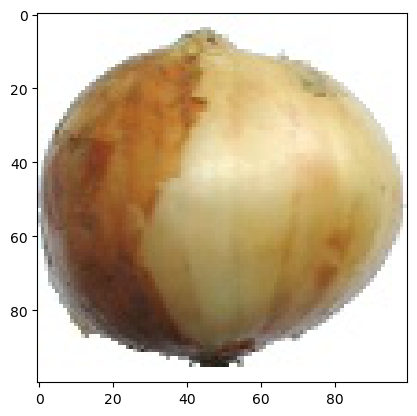

In [140]:
from PIL import Image
testb2 = "D:\College\AI ML\Vegetable Classification/Test/15_100(1).jpg"

sample_img =np.asarray(Image.open(testb2))
imgplot = plt.imshow(sample_img)

img = tf.keras.utils.load_img(
    testb2, target_size = (img_height,img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = mobilenet_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)],np.max(score)*100))


1/1 [==============================] - 0s 36ms/step
The image is Bell-Pepper and the accuracy is 30.53%


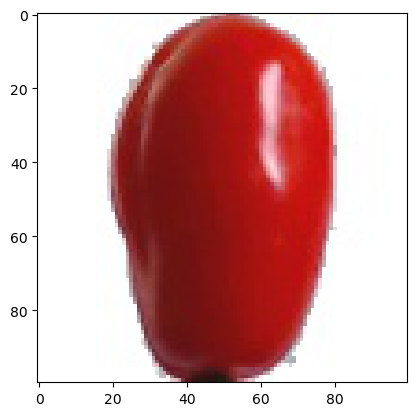

In [141]:
from PIL import Image
testb2 = "D:\College\AI ML\Vegetable Classification/Test/75_100(1).jpg"

sample_img =np.asarray(Image.open(testb2))
imgplot = plt.imshow(sample_img)

img = tf.keras.utils.load_img(
    testb2, target_size = (img_height,img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = mobilenet_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)],np.max(score)*100))


## 2. ResNet50 Model

### 2.1 Loading ResNet50 Model

In [179]:

# Load pre-trained ResNet-50 model without top classification layers
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(180, 180, 3))

# Freeze initial layers of the base model
freeze_layer_num = 1000
for layer in base_model.layers[:freeze_layer_num]:
    layer.trainable = False

In [180]:
# Add custom top layers
x = Flatten()(base_model.output)#flatten the output of the model
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)  # Add batch normalization
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)


In [181]:
# Create the final model
resnet_model = Model(inputs=base_model.input, outputs=output)

In [182]:
# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [183]:
# Define callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Define learning rate schedule
def lr_schedule(epoch, lr):
    if epoch < 3:
        return lr
    else:
        return lr * 0.1

lr_scheduler = LearningRateScheduler(lr_schedule)


### 2.2 Summary of ResNet50 Model

In [184]:
resnet_model.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_24 (InputLayer)       [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 186, 186, 3)          0         ['input_24[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 90, 90, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 90, 90, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

### 2.3 Training ResNet50 Model

In [185]:

# Train the model
epochs = 10  # Increase the number of epochs
history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/10
167/167 [==============================] - 201s 1s/step - loss: 1.2313 - accuracy: 0.5141 - val_loss: 12.6090 - val_accuracy: 0.1659 - lr: 0.0010
Epoch 2/10
167/167 [==============================] - 189s 1s/step - loss: 0.7479 - accuracy: 0.7085 - val_loss: 4.6615 - val_accuracy: 0.2860 - lr: 0.0010
Epoch 3/10
167/167 [==============================] - 202s 1s/step - loss: 0.5887 - accuracy: 0.7746 - val_loss: 2.2690 - val_accuracy: 0.4452 - lr: 0.0010
Epoch 4/10
167/167 [==============================] - 189s 1s/step - loss: 0.4913 - accuracy: 0.8146 - val_loss: 1.1780 - val_accuracy: 0.5796 - lr: 1.0000e-04
Epoch 5/10
167/167 [==============================] - 200s 1s/step - loss: 0.4524 - accuracy: 0.8339 - val_loss: 0.4653 - val_accuracy: 0.8378 - lr: 1.0000e-05
Epoch 6/10
167/167 [==============================] - 193s 1s/step - loss: 0.4588 - accuracy: 0.8246 - val_loss: 0.4213 - val_accuracy: 0.8363 - lr: 1.0000e-06
Epoch 7/10
167/167 [==============================]

## ResNet50 Model Prediction

1/1 [==============================] - 1s 963ms/step
The image is Tomato and the accuracy is 40.46%


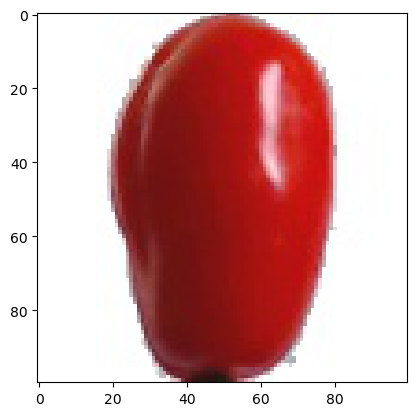

In [186]:
from PIL import Image
testb2 = "D:\College\AI ML\Vegetable Classification/Test/75_100(1).jpg"

sample_img =np.asarray(Image.open(testb2))
imgplot = plt.imshow(sample_img)

img = tf.keras.utils.load_img(
    testb2, target_size = (img_height,img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = resnet_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)],np.max(score)*100))


1/1 [==============================] - 0s 99ms/step
The image is Onion and the accuracy is 40.21%


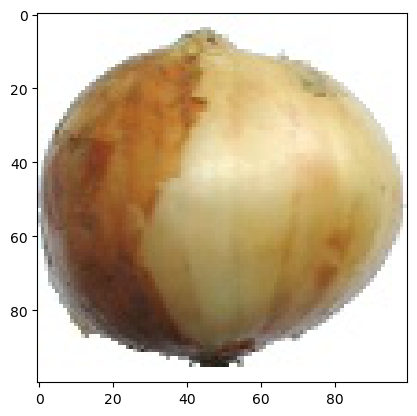

In [187]:
from PIL import Image
testb2 = "D:\College\AI ML\Vegetable Classification/Test/15_100(1).jpg"

sample_img =np.asarray(Image.open(testb2))
imgplot = plt.imshow(sample_img)

img = tf.keras.utils.load_img(
    testb2, target_size = (img_height,img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = resnet_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)],np.max(score)*100))


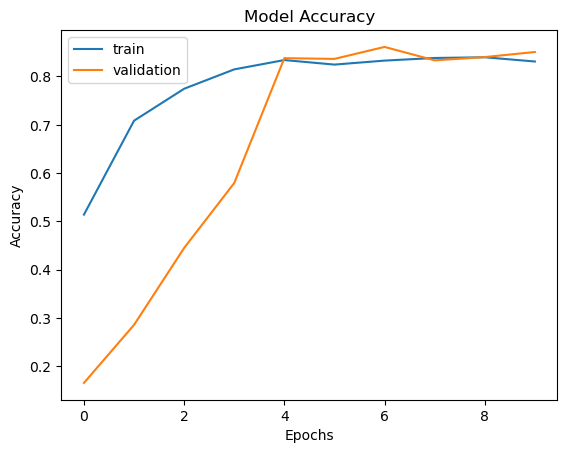

In [191]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

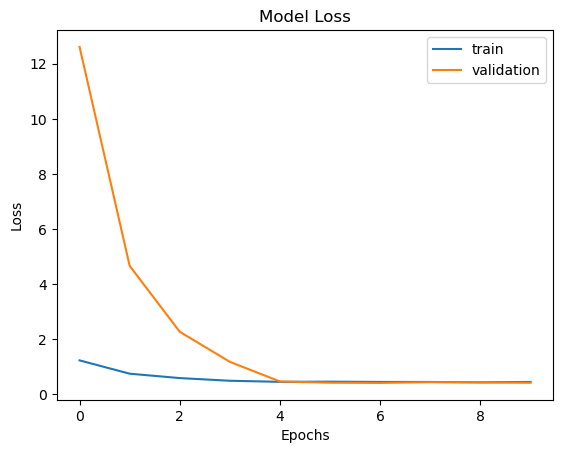

In [192]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

In [ ]:
loss0, accuracy0= model.evaluate(val_ds)
loss0, accuracy0= mobilenet_model.evaluate(val_ds)
loss0, accuracy0= resnet_model.evaluate(val_ds)